# Front Matter: CASA0013: Foundations of Spatial Data Science

## Title of Briefing

### Student ID

### Word Count:

# Reproducible Analysis

Please feel free to add as many code cells and markdown cells of comment/explanation as needed to make your code legible and clear. Your code should output any figures needed to disk.

## Classification of Airbnb penetration in London 

This notebook holds the analysis for the classification of Airbnb penetration in London. 
After a first exploration of the datasets with visualisations that seek to quantify the current picture of airbnb listings in London, the London wards are classified by their amaount of listings (low, medium, large), followed by a geodemographic classification of the neighboorhods that hopes to identify patterns expaining and perhaps predicting the presence or absense of listings. 

Data used for this analysis were obtained from the following sources:
* Airbnb listings, compiled 10 October 2021: <http://insideairbnb.com/get-the-data.html>
* London Wards data: <https://data.london.gov.uk/dataset/ward-profiles-and-atlas>
* London Wards geography: <https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london>

For ease of access the data has been saved on the following github repository: <https://github.com/DaphneBdn/fsds_cw3>

### Libraries

In [4]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

### Data import

In [ ]:
#saved in github repo!
# load files from link 
# make public

In [36]:
dataloc = os.path.join('Data','raw','listings.csv.gz')
print(dataloc)

Data/raw/listings.csv.gz


In [37]:
df = pd.read_csv(dataloc, compression='gzip', low_memory=False)
#df.head()
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 67,903 x 74


In [38]:
# check the dataframe by printing a sample
df.sample(5, random_state=42)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
53662,42409608,https://www.airbnb.com/rooms/42409608,20211010233627,2021-10-11,Cosy two bedroom home full of character,Cosy and welcoming flat on a quiet safe reside...,Famous All England Tennis Club 20 minute walk ...,https://a0.muscache.com/pictures/bf1d0be2-102a...,153634672,https://www.airbnb.com/users/show/153634672,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
49155,39318693,https://www.airbnb.com/rooms/39318693,20211010233627,2021-10-11,Frills-free yet Clean and Comfortable Bedroom,"• Frills-free yet very convenient, clean, quie...","2 minutes' walk to the ""legendary"" Brick Lane....",https://a0.muscache.com/pictures/460a0011-9524...,301890899,https://www.airbnb.com/users/show/301890899,...,5.0,5.00,4.00,NaN,f,1,0,1,0,0.08
36922,29555250,https://www.airbnb.com/rooms/29555250,20211010233627,2021-10-12,Unmissable Luxurious Mews House in Central London,This breathtaking elegant 2 bedroom house is l...,Belgravia is one of the most prestigious and u...,https://a0.muscache.com/pictures/f8b371f5-14dc...,27572615,https://www.airbnb.com/users/show/27572615,...,5.0,5.00,4.50,NaN,f,131,131,0,0,0.06
22088,19248360,https://www.airbnb.com/rooms/19248360,20211010233627,2021-10-11,Wonderful Private room+tea/coffee&sweets,"A beautiful private room in Stratford, excelle...",NaN,https://a0.muscache.com/pictures/b68ceecc-db45...,132839496,https://www.airbnb.com/users/show/132839496,...,4.4,3.95,4.53,NaN,t,5,0,5,0,0.38
13505,13104327,https://www.airbnb.com/rooms/13104327,20211010233627,2021-10-12,Spacious 2 bed apartment in Little Venice,"With a modern kitchen area, high spec bathroom...",Little Venice may be London’s best kept secret...,https://a0.muscache.com/pictures/b7216178-f1c1...,33889201,https://www.airbnb.com/users/show/33889201,...,NaN,NaN,NaN,NaN,t,857,856,1,0,NaN


In [39]:
# extract the column names
cols=df.columns
print(cols)
print(f"The Inside Airbnb dataset has {len(cols)} columns/variables")

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

### Investigate NA values

In [40]:
# change settings to display all rows
pd.set_option('display.max_rows', None)
df.isna().sum().sort_values(ascending=False)

neighbourhood_group_cleansed                    67903
calendar_updated                                67903
license                                         67903
bathrooms                                       67903
host_response_rate                              34288
host_response_time                              34288
host_acceptance_rate                            33907
host_about                                      30360
neighborhood_overview                           26939
neighbourhood                                   26938
review_scores_value                             20472
review_scores_location                          20468
review_scores_checkin                           20467
review_scores_communication                     20430
review_scores_accuracy                          20427
review_scores_cleanliness                       20415
first_review                                    19028
reviews_per_month                               19028
last_review                 

In [41]:
# change settings back 
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [42]:
print(cols)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [13]:
 sub_cols=['id', 'name',
       'host_id', 
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_is_superhost', 
       'host_neighbourhood', 
       'host_total_listings_count',  
       'neighbourhood_cleansed',
       'latitude','longitude', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'price',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating']

In [43]:
sub_cols=['id', 'name',
       'latitude','longitude', 'property_type', 'room_type', 'price',
       'availability_365', 'number_of_reviews_l30d', 'first_review',
       'last_review']

In [44]:
df= df[sub_cols]
df.set_index('id', inplace=True)
df.head()


,name,latitude,longitude,property_type,room_type,price,availability_365,number_of_reviews_l30d,first_review,last_review
id,,,,,,,,,,
13913,Holiday London DB Room Let-on going,51.56861,-0.11270,Private room in rental unit,Private room,$65.00,339,0,2011-07-11,2011-09-13
15400,Bright Chelsea Apartment. Chelsea!,51.48780,-0.16813,Entire rental unit,Entire home/apt,$75.00,2,0,2012-07-16,2019-08-10
17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,51.52195,-0.14094,Entire rental unit,Entire home/apt,$307.00,320,0,2011-09-18,2019-11-02
17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,51.47935,-0.19743,Private room in townhouse,Private room,$150.00,364,0,NaN,NaN
24328,"Battersea bedroom & studio, parking, shared ga...",51.47119,-0.16256,Entire townhouse,Entire home/apt,$200.00,273,0,2011-11-01,2015-10-24


In [49]:
# use pandas function replace to replace $ and comma eg $1,000

df["price"]=df.price.str.replace('$','').str.replace(',','').astype('float')
df.head()

,name,latitude,longitude,property_type,room_type,price,availability_365,number_of_reviews_l30d,first_review,last_review
id,,,,,,,,,,
13913,Holiday London DB Room Let-on going,51.56861,-0.11270,Private room in rental unit,Private room,65.0,339,0,2011-07-11,2011-09-13
15400,Bright Chelsea Apartment. Chelsea!,51.48780,-0.16813,Entire rental unit,Entire home/apt,75.0,2,0,2012-07-16,2019-08-10
17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,51.52195,-0.14094,Entire rental unit,Entire home/apt,307.0,320,0,2011-09-18,2019-11-02
17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,51.47935,-0.19743,Private room in townhouse,Private room,150.0,364,0,NaN,NaN
24328,"Battersea bedroom & studio, parking, shared ga...",51.47119,-0.16256,Entire townhouse,Entire home/apt,200.0,273,0,2011-11-01,2015-10-24


Convert the dataframe(df) into a geodataframe using the epsg code for the World Geodetic System 1984, then convert to British National Grid 

In [61]:
gdf = gpd.GeoDataFrame(df, 
                      geometry=gpd.points_from_xy(df.longitude, df.latitude, crs= 'epsg:4326'))
gdf = gdf.to_crs('epsg:27700')

<AxesSubplot:>

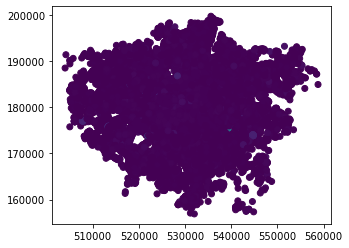

In [62]:
#check the geodataframe
gdf.plot(column="price")

## Geometry 

In [28]:
dataloc_geo = os.path.join("Data","raw", "statistical-gis-boundaries-london","ESRI", "London_Ward_CityMerged.shp")
print(dataloc_geo)

Data/raw/statistical-gis-boundaries-london/ESRI/London_Ward_CityMerged.shp


<AxesSubplot:>

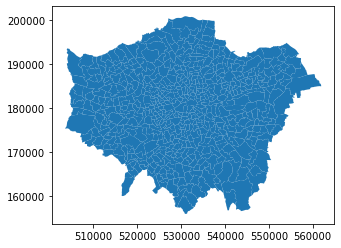

In [29]:
wards = gpd.read_file( dataloc_geo )
wards.plot()

# add river!!


In [64]:
wards = wards.to_crs('epsg:27700')

### Join data

In [58]:
gdf.sample(3)

,name,latitude,longitude,property_type,room_type,price,availability_365,number_of_reviews_l30d,first_review,last_review,geometry
id,,,,,,,,,,,
12959839,"Clean, warm, single room",51.57321,-0.38598,Private room in townhouse,Private room,25.0,336,3,2017-02-25,2021-10-06,POINT (-0.38598 51.57321)
21247712,Not available anymore,51.56837,0.11759,Private room in rental unit,Private room,20.0,0,0,2017-10-16,2018-07-08,POINT (0.11759 51.56837)
34985476,Victorian terrace close to historic Greenwich,51.48716,0.02405,Entire townhouse,Entire home/apt,150.0,0,0,NaN,NaN,POINT (0.02405 51.48716)


In [59]:
wards.sample(3)

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
123,Heathrow Villages,E05000331,2352.117,0.0,E09000017,Hillingdon,116716,"POLYGON ((503611.200 175520.400, 503613.300 17..."
356,Loxford,E05000507,128.823,2.3,E09000026,Redbridge,51354,"POLYGON ((542905.700 186191.700, 542950.600 18..."
313,Lower Edmonton,E05000204,218.248,0.0,E09000010,Enfield,117077,"POLYGON ((536948.900 193739.300, 536933.500 19..."


In [65]:
gdf_wards = gpd.sjoin(gdf, wards, how='left', op='within')
print(gdf_wards.columns.values)

['name' 'latitude' 'longitude' 'property_type' 'room_type' 'price'
 'availability_365' 'number_of_reviews_l30d' 'first_review' 'last_review'
 'geometry' 'index_right' 'NAME' 'GSS_CODE' 'HECTARES' 'NONLD_AREA'
 'LB_GSS_CD' 'BOROUGH' 'POLY_ID']


In [66]:
gdf_wards.sample(3)

,name,latitude,longitude,property_type,room_type,price,availability_365,number_of_reviews_l30d,first_review,last_review,geometry,index_right,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID
id,,,,,,,,,,,,,,,,,,,
5377013,"Modern 1 Bed next to Tower Bridge, views of Shard",51.500380,-0.088360,Entire condominium (condo),Entire home/apt,85.0,0,0,2019-08-12,2019-08-21,POINT (532786.077 179670.201),246.0,Grange,E05000542,121.453,0.000,E09000028,Southwark,117354.0
49007479,Student Only Property: Nice Twin Studio - 42 w...,51.481350,-0.125100,Entire rental unit,Entire home/apt,45.0,358,0,NaN,NaN,POINT (530290.310 177488.048),220.0,Oval,E05000426,127.764,3.586,E09000022,Lambeth,117366.0
52541442,Confortable 2 Bed flat in perfect central loca...,51.524075,-0.164492,Entire rental unit,Entire home/apt,190.0,318,0,NaN,NaN,POINT (527435.982 182169.927),486.0,Bryanston and Dorset Square,E05000632,72.318,0.000,E09000033,Westminster,50771.0


<AxesSubplot:>

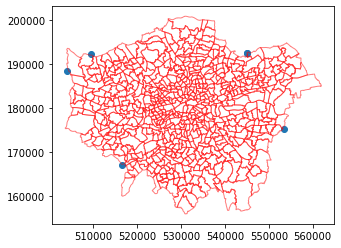

In [68]:
ax=gdf_wards[gdf_wards['NAME'].isnull()].plot()
wards.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.5)

In [69]:
#drop listings without ward name
gdf_wards.drop(index=gdf[gdf_wards['NAME'].isnull()].index, axis=1, inplace=True)
print(gdf_wards.shape)


(67897, 19)


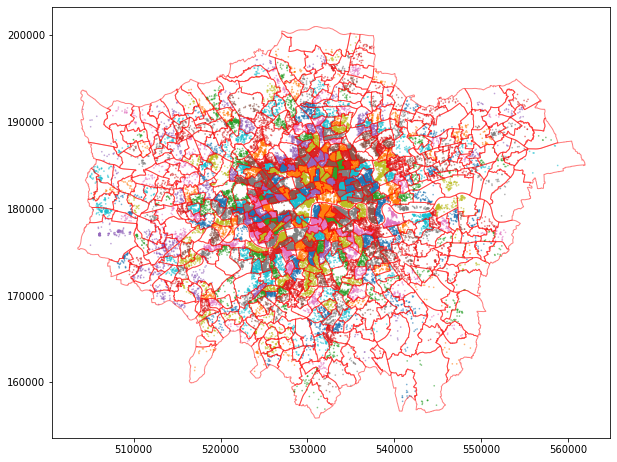

In [70]:
ax = gdf_wards.plot(column='NAME', markersize=0.5, alpha=0.5, figsize=(10,8))
wards.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.5);

In [ ]:
### Create London Boundary 

<AxesSubplot:>

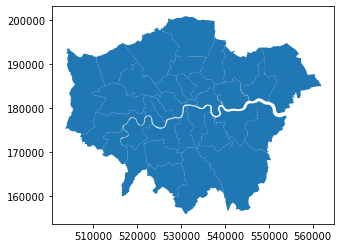

In [73]:
#boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')
boros.plot()

In [74]:
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})


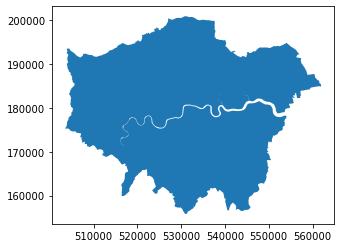

In [82]:
ldn['geometry'] = ldn.original.buffer(20)
ldn = ldn.set_geometry('geometry')
ldn.plot();

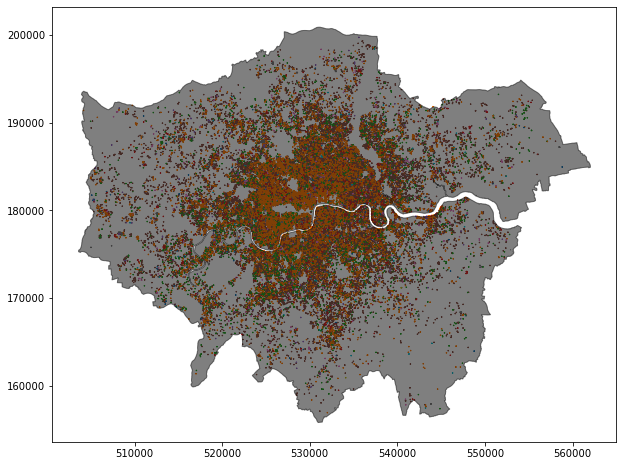

In [87]:
ax = gdf_wards.plot(column="property_type",figsize=(12,8), marker='*', markersize=0.5)
ldn.plot(ax=ax, edgecolor='black', facecolor='black', alpha=0.5);

# Executive Briefing

This should be composed of markdown cells _only_. You may have more than one markdown cell so as to support a useful Table of Contents. Images should be included by reference using the standard Markdown format `![Alt text here](local/image/created_in_code.png)`. 
<br>
Add each section of your briefing to the corresponding cell below. 
<br>
_Additional guidence on the structure can be found on Moodle_


## Executive summary


## Background

## Data Analysis

## Conclusion

# Bibliography

This should be a list in markdown of any documents referenced in the _Executive Briefing_. Please also link to the document using the standard Markdown format `[Link text](https://link.website.org/)`. If the document is an academic article or other piece requiring authentication please link to a DOI.
